In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/2022-2023 Football Player Stats.csv', encoding='ISO-8859-1', delimiter=';')

df.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [ ]:
df = df.drop('Rk', axis=1)


In [ ]:
info_erling_haaland = df[df['Player'] == 'Eerling Haaland']

# Imprimir todas as informações relacionadas ao jogador 'Erling Haaland'
print(info_erling_haaland.Pos)

63    DF
Name: Pos, dtype: object


<Axes: xlabel='Pos', ylabel='Count'>

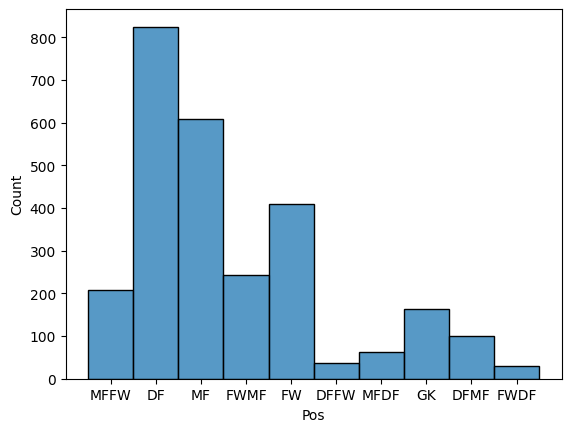

In [ ]:
sns.histplot(df['Pos'])

In [ ]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 124 columns):
 #    Column         Dtype  
---   ------         -----  
 0    Rk             int64  
 1    Player         object 
 2    Nation         object 
 3    Pos            object 
 4    Squad          object 
 5    Comp           object 
 6    Age            int64  
 7    Born           int64  
 8    MP             int64  
 9    Starts         int64  
 10   Min            int64  
 11   90s            float64
 12   Goals          int64  
 13   Shots          float64
 14   SoT            float64
 15   SoT%           float64
 16   G/Sh           float64
 17   G/SoT          float64
 18   ShoDist        float64
 19   ShoFK          float64
 20   ShoPK          float64
 21   PKatt          float64
 22   PasTotCmp      float64
 23   PasTotAtt      float64
 24   PasTotCmp%     float64
 25   PasTotDist     float64
 26   PasTotPrgDist  float64
 27   PasShoCmp      float64
 28   PasShoAtt      f

In [ ]:
print(df.isnull().sum())

Rk         0
Player     0
Nation     1
Pos        0
Squad      0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 124, dtype: int64


In [ ]:
df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,...,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,1345.000000,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,...,0.204697,1.661636,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,43.583600
std,776.391761,4.446259,4.450108,6.864278,6.994383,591.094260,6.567484,2.013714,1.424619,0.754716,...,0.552376,2.319000,1.235965,0.043781,0.077399,0.022607,2.901833,1.579539,1.830391,26.673092
min,1.000000,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,673.000000,23.000000,1993.000000,5.000000,2.000000,194.000000,2.200000,0.000000,0.260000,0.000000,...,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.330000,0.330000,0.550000,27.600000
50%,1345.000000,26.000000,1996.000000,13.000000,7.000000,684.000000,7.600000,0.000000,0.860000,0.180000,...,0.000000,0.760000,0.830000,0.000000,0.000000,0.000000,5.000000,0.930000,1.100000,46.400000
75%,2017.000000,29.000000,2000.000000,18.000000,14.000000,1245.000000,13.800000,1.000000,1.850000,0.590000,...,0.210000,2.500000,1.320000,0.000000,0.000000,0.000000,6.270000,1.790000,1.830000,60.000000
max,2689.000000,41.000000,2007.000000,23.000000,23.000000,2070.000000,23.000000,25.000000,15.000000,10.000000,...,10.000000,30.000000,20.000000,0.870000,2.000000,0.500000,30.000000,25.000000,30.000000,100.000000


In [ ]:
#Divisão do data-frame em data-frames por posição
# Defensor
df_df = df[df['Pos'] == 'DF'].copy()
# Meio-Campista
df_mf = df[df['Pos'] == 'MF'].copy()
# Atacante-Meio-Campista
df_fwmf = df[df['Pos'] == 'FWMF'].copy()
# Atacante, de qualquer tipo
df_fw = df[df['Pos'] == 'FW'].copy()
# Defensor-Atacante
df_dffw = df[df['Pos'] == 'DFFW'].copy()
# Meio-Campista-Defensor
df_mfdf = df[df['Pos'] == 'MFDF'].copy()
# Goleiro (Goalkeeper)
df_gk = df[df['Pos'] == 'GK'].copy()
# Defensor-Meio-Campista
df_dfmf = df[df['Pos'] == 'DFMF'].copy()
# Atacante-Defensor
df_fwdf = df[df['Pos'] == 'FWDF'].copy()
# Meio-Campista-Atacante
df_mffw = df[df['Pos']=='MFFW'].copy()



In [ ]:
#Features para treino por cada posição
fw_features = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis","PasTotCmp"]
mf_features = ["Goals","PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarTotDist", "CarPrgDist" , "Fld"]
df_features = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks",
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr","Carries","CarTotDist"
                     ,"TouDefPen","TouDef3rd","TouMid3rd","TouAtt3rd","TouAttPen","Assists"]
dfmf_features=["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks",
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr","Carries","CarTotDist"
                     ,"TouDefPen","TouDef3rd","TouMid3rd","TouAtt3rd","TouAttPen",'GCA','GcaPassLive','GcaPassDead','GcaDrib']
mfdf_features=["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists","PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl"]
dffw_features=["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks",
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr","Carries","CarTotDist"
                     ,"TouDefPen","TouDef3rd","TouMid3rd","TouAtt3rd","TouAttPen","Assists","Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib" , "GCA","PasAss", "Pas3rd"]
fwmf_features=["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis","PasTotCmp","PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%"]
fwdf_features=["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis","PasTotCmp","PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%"]
gk_features=["PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int"]

In [ ]:
#Data-frames de cada posição apenas com as deatures para treino
df_ataq = df_fw[fw_features].copy()
df_def= df_df[df_features].copy()
df_mei = df_mf[mf_features].copy()
df_ataqmei = df_fwmf[fwmf_features].copy()
df_meidef= df_mfdf[mfdf_features].copy()
df_defataq= df_dffw[dffw_features].copy()
df_gol=df_gk[gk_features].copy()
df_ataqdef = df_fwdf[fwdf_features].copy()
df_defmei = df_dfmf[dfmf_features].copy()
df_meiataq=df_mffw[fwmf_features].copy()

In [ ]:
model = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('clusterizer', KMeans())
])

param_grid = {
    'clusterizer__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'clusterizer__init': ['k-means++', 'random'],
    'clusterizer__n_init': [10, 20, 30, 40, 50],
    'clusterizer__max_iter': [100, 200, 300, 400, 500]
}

In [ ]:
#Função de busca de hiperparâmetros e treino
def train(df,model,param_grid):
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

  grid_search.fit(df)

  bestmodel = grid_search.best_estimator_
  print(f'Base {df} ',grid_search.best_params_)
  bestmodel.fit(df)
  predictions = bestmodel.predict(df)
  print(predictions)
  return predictions

In [ ]:
DFS = [df_ataq,df_def,df_mei,df_gol,df_ataqdef,df_ataqmei,df_defataq,df_defmei,df_meidef,df_meiataq]

In [ ]:
for x in DFS:
  x['Cluster']=train(x,model=model,param_grid=param_grid)

Base       Goals  Shots   SoT  G/Sh  G/SoT  ShoDist   GCA   SCA   Off  PKwon  \
10        6   2.67  1.25  0.13   0.27     11.6  0.51  3.07  0.51   0.06   
12        0   2.50  0.00  0.00   0.00     26.1  0.00  2.50  0.00   0.00   
14        4   2.06  0.74  0.11   0.31     14.5  0.29  2.63  0.40   0.00   
20        1   1.94  0.69  0.07   0.20     12.3  0.42  2.64  0.28   0.00   
33        0   0.00  0.00  0.00   0.00      0.0  0.00  0.00  0.00   0.00   
...     ...    ...   ...   ...    ...      ...   ...   ...   ...    ...   
2657      1   2.84  0.68  0.05   0.20     15.7  0.41  2.70  0.54   0.14   
2667      0   1.67  1.67  0.00   0.00     13.8  0.00  0.00  1.67   0.00   
2674      1   3.08  0.77  0.06   0.25     14.4  0.58  4.04  0.19   0.00   
2677      3   1.93  0.59  0.12   0.38     12.8  0.07  1.11  0.44   0.00   
2687      1   1.03  0.26  0.13   0.50     11.0  0.13  2.82  0.38   0.00   

      ScaDrib  Assists  ScaPassLive  Car3rd  ScaFld  ToAtt  ToSuc  Carries  \
10       0.23   

In [ ]:
#Atribuição dos nomes para os data-frames com as features específicas e clusters
df_ataq['Player'] = df_fw['Player']
df_def['Player'] = df_df['Player']
df_mei['Player'] = df_mf['Player']
df_defmei['Player'] = df_dfmf['Player']
df_meidef['Player'] = df_mfdf['Player']
df_defataq['Player'] = df_dffw['Player']
df_gol['Player'] = df_gk['Player']
df_ataqdef['Player'] = df_fwdf['Player']
df_ataqmei['Player']=df_fwmf['Player']
df_meiataq['Player']=df_mffw['Player']



In [ ]:
jogadores = ['Vinicius Júnior', 'Erling Haaland', 'Kylian Mbappé', 'Robert Lewandowski', 'Mohamed Salah',
             'Jack Grealish', 'Ousmane Dembélé', 'Victor Osimhen', 'Lautaro Martínez','Raphinha','Joselu']


for jogador in jogadores:
    print(f"Informações de {jogador} em df_ataq:")
    info_df_ataq = df_ataq[df_ataq['Player'] == jogador]
    if not info_df_ataq.empty:
        print(info_df_ataq)
    else:
        print(f"{jogador} não encontrado em df_ataq.")
    print("\n")

Informações de Vinicius Júnior em df_ataq:
      Goals  Shots   SoT  G/Sh  G/SoT  ShoDist   GCA   SCA   Off  PKwon  \
1233      7   2.51  1.23  0.14   0.29     16.4  0.56  4.51  0.62   0.05   

      ScaDrib  Assists  ScaPassLive  Car3rd  ScaFld  ToAtt  ToSuc  Carries  \
1233     0.46     0.15         3.08    3.03    0.46    8.1   2.82     41.1   

      CarTotDist  CarPrgDist   CPA  CarMis  CarDis  PasTotCmp  Cluster  \
1233       323.2       175.6  3.64    2.82     1.9       27.7        4   

               Player  
1233  Vinicius Júnior  


Informações de Erling Haaland em df_ataq:
      Goals  Shots   SoT  G/Sh  G/SoT  ShoDist   GCA   SCA   Off  PKwon  \
1057     25   3.85  1.98   0.3   0.58     12.6  0.38  2.03  0.27   0.05   

      ScaDrib  Assists  ScaPassLive  Car3rd  ScaFld  ToAtt  ToSuc  Carries  \
1057     0.11     0.16         1.43    0.27    0.22   0.77   0.27     12.6   

      CarTotDist  CarPrgDist   CPA  CarMis  CarDis  PasTotCmp  Cluster  \
1057        55.7        20

In [ ]:
jogadores = ['Trent Alexander-Arnold', 'Virgil van Dijk', 'Rúben Dias', 'Thiago Silva', 'Kyle Walker',
             'David Alaba', 'Alphonso Davies', 'Aymeric Laporte','Lisandro Martínez','Éder Militão']


for jogador in jogadores:
    print(f"Informações de {jogador} em df_def:")
    info_df_def = df_def[df_def['Player'] == jogador]
    if not info_df_def.empty:
        print(info_df_def)
    else:
        print(f"{jogador} não encontrado em df_def.")
    print("\n")

Informações de Trent Alexander-Arnold em df_def:
    PasTotCmp  PasTotDist  PasTotPrgDist   Tkl  TklWon  TklDef3rd  TklMid3rd  \
63       64.9      1236.3          518.4  1.44    1.06       0.94       0.31   

    TklAtt3rd  TklDri  TklDriAtt  TklDriPast  Blocks  BlkSh   Int  Tkl+Int  \
63       0.19     1.0       1.88        0.88    0.75   0.25  1.38     2.81   

    Recov  AerWon  AerLost  Carries  CarTotDist  CarPrgDist  CrdY  CrdR  Fls  \
63   7.56    0.69     0.44     52.4       196.1       102.3  0.19   0.0  0.5   

     Clr  Carries  CarTotDist  TouDefPen  TouDef3rd  TouMid3rd  TouAtt3rd  \
63  1.13     52.4       196.1       3.06       22.4       48.8       26.8   

    TouAttPen  Assists  Cluster                  Player  
63       1.69     0.06        1  Trent Alexander-Arnold  


Informações de Virgil van Dijk em df_def:
      PasTotCmp  PasTotDist  PasTotPrgDist   Tkl  TklWon  TklDef3rd  \
2514       71.5      1417.9          504.7  0.61    0.18       0.42   

      TklMid3r

In [ ]:
print(df_ataqmei['Cluster'])

6       5
7       0
9       9
16      5
19      1
       ..
2635    4
2642    7
2644    9
2665    1
2675    1
Name: Cluster, Length: 244, dtype: int32


<Axes: xlabel='Cluster', ylabel='Count'>

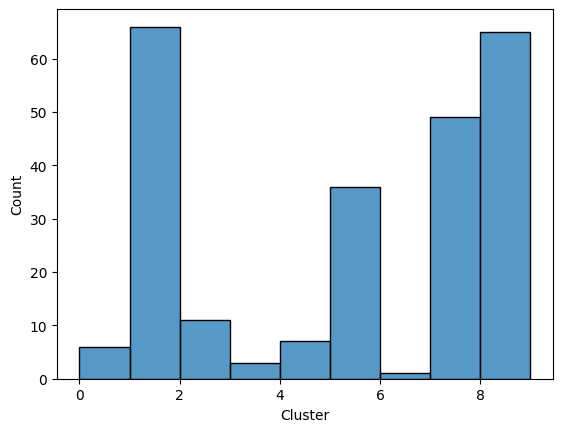

In [ ]:
sns.histplot(df_ataqmei['Cluster'])

In [ ]:
for x in df_ataqmei['Player'],df_ataqmei['Cluster']:
  print(x)

6          Matthis Abline
7          Matthis Abline
9       Zakaria Aboukhlal
16         Sargis Adamyan
19          Karim Adeyemi
              ...        
2635        Kelvin Yeboah
2642      Mattia Zaccagni
2644        Wilfried Zaha
2665         Arber Zeneli
2675         Hakim Ziyech
Name: Player, Length: 244, dtype: object
6       5
7       0
9       9
16      5
19      1
       ..
2635    4
2642    7
2644    9
2665    1
2675    1
Name: Cluster, Length: 244, dtype: int32


In [ ]:
#Função para colocar os clusters, dos data frames posicionais, no dataframe original
def addClusters(df_geral,df_pos):

  df_final = pd.merge(df_geral, df_pos[['Player', 'Cluster']], on='Player', how='left')
  return df_final


In [ ]:
dfs_clusters = []

for df_pos in DFS:
    df_cluster = df_pos[['Player', 'Cluster']].copy()
    dfs_clusters.append(df_cluster)


df_clusters_ = pd.concat(dfs_clusters, ignore_index=True)
print(df_clusters_)

                Player  Cluster
0        Tammy Abraham        6
1         Mohamed Achi        4
2            Che Adams        0
3           Amine Adli        0
4           Amar Ahmed        4
...                ...      ...
2684   Rodrigo Zalazar        3
2685  Luca Zanimacchia        3
2686    Nicolò Zaniolo        3
2687      Oier Zarraga        2
2688     Filip ?uri?i?        3

[2689 rows x 2 columns]


In [ ]:
df2=df
df_final1=pd.DataFrame(addClusters(df2,df_clusters_))

In [ ]:
nomes_na = df_final1.loc[df_final1['Cluster'].isna(), ['Player', 'Pos']]


# Exibir os nomes dos jogadores
print(nomes_na)

                Player   Pos
0     Brenden Aaronson  MFFW
2        Himad Abdelli  MFFW
20      Martin Adeline  MFFW
23         Yacine Adli  MFFW
30       Kevin Agudelo  MFFW
...                ...   ...
2918   Rodrigo Zalazar  MFFW
2923  Luca Zanimacchia  MFFW
2924    Nicolò Zaniolo  MFFW
2931      Oier Zarraga  MFFW
2966     Filip ?uri?i?  MFFW

[190 rows x 2 columns]


In [ ]:
#Função para busca dos sete jogadores mais próximos dentro da posição e do cluster, usando todas as features
def jogadores_recomendados(nome_jogador, df):

    posicao_jogador = df.loc[df['Player'] == nome_jogador, 'Pos'].iloc[0]
    jogadores_posicao = df[df['Pos'] == posicao_jogador]
    cluster_jogador = df.loc[df['Player'] == nome_jogador, 'Cluster'].iloc[0]
    jogadores_cluster = jogadores_posicao[jogadores_posicao['Cluster'] == cluster_jogador]
    dados_jogador = df[df['Player'] == nome_jogador].drop(['Player', 'Cluster', 'Pos', 'Comp', 'Squad', 'Nation'], axis=1)
    distancias = scipy.spatial.distance.cdist(dados_jogador, jogadores_cluster.drop(['Player', 'Cluster', 'Pos', 'Comp', 'Squad', 'Nation'], axis=1), metric='euclidean')
    distancias_df = pd.DataFrame({'Player': jogadores_cluster['Player'], 'Distancia': distancias.flatten()})
    jogadores_finais = distancias_df.sort_values(by='Distancia').head(7)

    return jogadores_finais

In [ ]:
def features_por_posicao(posicao):
    if posicao == 'FW':
        return fw_features
    elif posicao == 'MF':
        return mf_features
    elif posicao == 'DF':
        return df_features
    elif posicao == 'DFMF':
        return dfmf_features
    elif posicao == 'MFDF':
        return mfdf_features
    elif posicao == 'DFFW':
        return dffw_features
    elif posicao == 'FWMF':
        return fwmf_features
    elif posicao == 'FWDF':
        return fwdf_features
    elif posicao == 'GK':
        return gk_features
    else:
        return None

In [ ]:
import scipy.spatial.distance
#Função para busca dos sete jogadores mais próximos dentro da posição e do cluster, usando apenas as features da posição
def jogadoresRecomendados(nome_jogador, df):
    posicao_jogador = df.loc[df['Player'] == nome_jogador, 'Pos'].iloc[0]
    features = features_por_posicao(posicao_jogador)
    jogadores_posicao = df[df['Pos'] == posicao_jogador]
    cluster_jogador = df.loc[df['Player'] == nome_jogador, 'Cluster'].iloc[0]
    jogadores_cluster = jogadores_posicao[jogadores_posicao['Cluster'] == cluster_jogador]
    dados_jogador = df[df['Player'] == nome_jogador]
    distancias = scipy.spatial.distance.cdist(dados_jogador[features], jogadores_cluster[features], metric='euclidean')
    distancias_df = pd.DataFrame({'Player': jogadores_cluster['Player'], 'Distancia': distancias.flatten()})
    jogadores_finais = distancias_df.sort_values(by='Distancia').head(7)

    return jogadores_finais



In [ ]:
df_final1['Cluster'].isnull().sum()

0

In [ ]:
x = jogadores_recomendados('Erling Haaland',df_final1)
print(x)

                   Player   Distancia
1177       Erling Haaland    0.000000
1277   Mounaim El Idrissy  150.706055
1279       Borja Iglesias  192.313005
1355               Joselu  200.377681
1122  Michael Gregoritsch  207.984300
1245      Philipp Hofmann  218.634066
1343      Brennan Johnson  249.292247


In [ ]:
jogadores = ['Mounaim El Idrissy', 'Borja Iglesias', 'Joselu','Michael Gregoritsch','Philipp Hofmann','Brennan Johnson ']


for jogador in jogadores:
    print(f"Informações de {jogador} em df_ataq:")
    info_df_ataq = df_ataq[df_ataq['Player'] == jogador]
    if not info_df_ataq.empty:
        print(info_df_ataq)
    else:
        print(f"{jogador} não encontrado em df_ataq.")
    print("\n")

Informações de Mounaim El Idrissy em df_ataq:
      Goals  Shots  SoT  G/Sh  G/SoT  ShoDist   GCA   SCA   Off  PKwon  \
1153      4    2.2  0.9   0.1   0.25     14.6  0.11  1.75  0.96   0.11   

      ScaDrib  Assists  ScaPassLive  Car3rd  ScaFld  ToAtt  ToSuc  Carries  \
1153      0.0      0.0         1.07     0.9    0.62   1.02   0.28     21.6   

      CarTotDist  CarPrgDist   CPA  CarMis  CarDis  PasTotCmp  Cluster  \
1153       120.6        32.3  0.17    3.28     1.3       15.4        6   

                  Player  
1153  Mounaim El Idrissy  


Informações de Borja Iglesias em df_ataq:
      Goals  Shots   SoT  G/Sh  G/SoT  ShoDist  GCA   SCA   Off  PKwon  \
1155      9   2.38  0.85  0.13   0.36     15.4  0.3  1.59  0.91    0.0   

      ScaDrib  Assists  ScaPassLive  Car3rd  ScaFld  ToAtt  ToSuc  Carries  \
1155     0.06     0.18         1.04    0.55    0.18   1.28   0.49     16.8   

      CarTotDist  CarPrgDist   CPA  CarMis  CarDis  PasTotCmp  Cluster  \
1155        82.0     

In [ ]:
x = jogadoresRecomendados('Erling Haaland',df_final1)
print(x)

                   Player  Distancia
1177       Erling Haaland   0.000000
1355               Joselu  16.426147
1122  Michael Gregoritsch  18.701027
299                  Beto  21.704665
1245      Philipp Hofmann  22.049576
515        Edinson Cavani  22.407932
931         Evan Ferguson  23.930042


In [ ]:
df_final1.to_csv('/content/dfFootaballClusters.csv',  index=False, sep=';', encoding='utf-8', float_format='%.2f')
